In [3]:
import csv
import xml.etree.ElementTree as ET
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys, os
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *

from data_manager import *
from metadata import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Setting environment for AWS compute node


No vtk


In [4]:
from annotation_utilities import *
from registration_utilities import *
from conversion import *

In [5]:
# stack = 'LM40'
# stack = 'LM30'
# xmlfile = '/shared/lauren_data/%s_export.xml' % stack
# stack = 'LM40new'
# xmlfile = '/shared/lauren_data/LM40_new.xml'
# stack = 'LM30new'
# xmlfile = '/shared/lauren_data/LM30_new.xml'
# stack = 'LM31'
# xmlfile = '/shared/lauren_data/LM31_FINAL.xml'
stack = 'LM38'
xmlfile = '/shared/lauren_data/LM38_FINAL.xml'
# stack = 'LM48'
# xmlfile = '/shared/lauren_data/LM48_FINAL.xml'

# stack = 'RV9_53hrs'
# stack = 'RV19_61hrs'
# stack = 'RV13_64hrs'
# stack = 'RV14_65hrs'
# stack = 'RV4_67hrs'
# xmlfile = '/shared/stacy_data/%s.xml' % stack
download_from_s3(xmlfile)

In [6]:
# create element tree object
tree = ET.parse(xmlfile)

# get root element
root = tree.getroot()

prefix = '{http://www.mbfbioscience.com/2007/neurolucida}'

# Lauren data
neurolucida_name_map = \
{"Contour Name 1": 'RMC_L',
"Contour Name 2": '3N_L',
# "Contour Name 3": 'fr',
# 'Brain': 'outerContour',
 '3N': '3N_L',
 'RN': 'RMC_L',
 'RedNuc': 'RMC_L',
 'SNR': 'SNR_L'}

# Stacy data
# neurolucida_name_map = \
# {"IO": 'IO_L',
# "LRT": 'LRt_L',
# # "BRAINSTEM": 'brainstem',
# '5 MOTOR': '5N_L',
#  '7n': '7n_L',
# 'AMB MOTOR': 'Amb_L',
# 'FACIAL MOTOR': '7N_L',
#  'SpVC': 'Sp5C_L',
#  'SpVO': 'Sp5O_L',
#  'Sp5I': 'Sp5I_L',
#  'Pr5': 'Pr5_L',
#  'Sol': 'Sol_L',
#  'Li': 'Li_L',
# #  'SpVIO': 'unknown',
# 'R LrT': 'LRt_R',
# 'R FN':  '7N_R',
# 'R_7n': '7n_R',
# 'R 5N':  '5N_R',
# 'R SpVC': 'Sp5C_R',
# 'R Sp5I': 'Sp5I_R',
# 'R SpVO': 'Sp5O_R',
# 'R Pr5':  'Pr5_R',
# 'R IO':  'IO_R',
#  'R-SpVI':  'Sp5I_R',
# 'R-SpV':  'Sp5_R',
# 'R-SpVO':  'Sp5O_R',
#  'R-PrV':  'Pr5_R',
#  'R-Amb':  'Amb_R',
# #  'R SpVIO':  'unknown',
#  'SpVC_R':  'Sp5C_R',
#  'R 5M':  '5N_R',
# #  'User Line 5':  'unknown',
# #  'NewContour': 'unknown',
# #   'User Line 2':  'unknown',
# }

In [7]:
contours = defaultdict(list)

for item in root.findall(prefix+'contour'):
    name = item.attrib['name']
    if name not in neurolucida_name_map:
#         raise Exception('Name %s in stack %s not recognized' % (name, stack))
        sys.stderr.write('Name %s in stack %s not recognized. Ignored.\n' % (name, stack))
        continue
    name = neurolucida_name_map[name]
    curr_contour = []
#     try:
#         resolution = float(item.findall(prefix+'resolution')[0].text)
#         print resolution
#     except:
#         pass
    for p in item.findall(prefix+'point'):
        curr_contour.append((float(p.attrib['x']), float(p.attrib['y']), float(p.attrib['z'])))
    contours[name].append(np.array(curr_contour))
    
contours.default_factory = None

Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name fr in stack LM38 not recognized. Ignored.
Name SNl in stack LM38 not recognized. Ignored.
Name Brain Outline in stack LM38 not recognized. Ignored.
Name Brain Outline in stack LM38 not recognized. Ignored.
Name Brain Outline in stack LM38 not recognized. Ignored.
Name Brain Outline in stack LM38 not recognized. Ignored.
Name SNl in stack LM38 not recognized. Ignored.
Name Brain Outline in stack LM38 not recognized. Ignored.
Name Brain Outline in stack LM38 not recognized. Ignored.
Name Brain Outline in stack LM38 not re

In [8]:
# markers = defaultdict(list)
markers = {}
name = 'SNR'

for item in root.findall(prefix+'marker'):
    curr_markers = []
    for p in item.findall(prefix+'point'):
        curr_markers.append((float(p.attrib['x']), float(p.attrib['y']), float(p.attrib['z'])))
    markers[name] = np.array(curr_markers)
    
# markers.default_factory = None

In [9]:
contour_colors = dict(zip(contours.keys(), np.array(random_colors(len(contours)))/255.))

In [10]:
marker_colors = dict(zip(markers.keys(), np.array(random_colors(len(markers)))/255.))

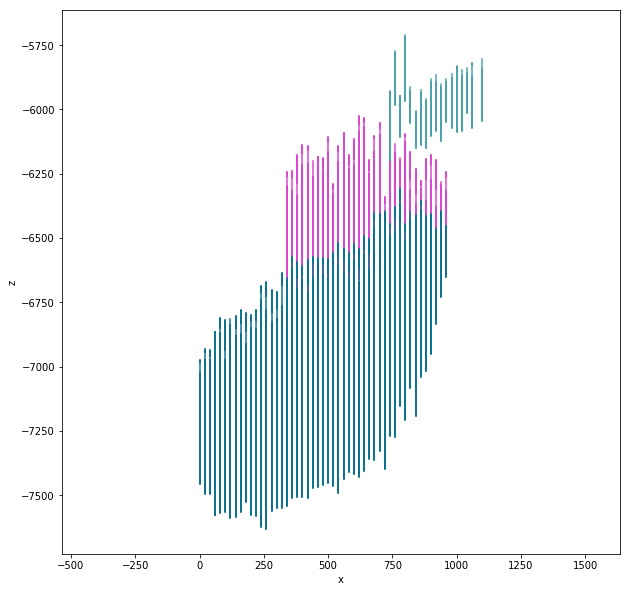

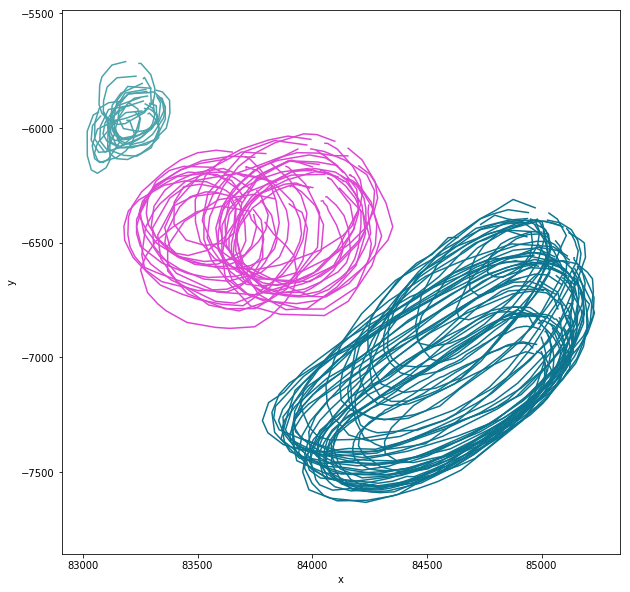

In [11]:
plt.figure(figsize=(10, 10));

for name, cnts in contours.iteritems():    
#     if parse_label(name)[1] == 'L' and \
#     (parse_label(name)[0] == '5N' or parse_label(name)[0] == '7N'  or parse_label(name)[0] == '7n' or parse_label(name)[0] == 'Sp5C'):
#     if parse_label(name)[0] == '7N':
        for cnt in cnts:
            plt.plot(cnt[:, 2], cnt[:, 1], c=contour_colors[name]);
plt.axis('equal');
plt.xlabel('x');
plt.ylabel('z');
            
plt.figure(figsize=(10, 10));
for name, cnts in contours.iteritems():    
#     if parse_label(name)[1] == 'L' and \
#     (parse_label(name)[0] == '5N' or parse_label(name)[0] == '7N'  or parse_label(name)[0] == '7n' or parse_label(name)[0] == 'Sp5C'):
#     if parse_label(name)[0] == '7N':
        for cnt in cnts:
            plt.plot(cnt[:, 0], cnt[:, 1], c=contour_colors[name]);

# for name, mkrs in markers.iteritems():
#     plt.scatter(mkrs[:, 0], mkrs[:, 1], c=marker_colors[name], s=1, zorder=9);

plt.xlabel('x');
plt.ylabel('y');
plt.axis('equal');
# plt.legend();

In [97]:
# contour coordinates are in um already.

In [98]:
structure_subset = \
[name for name in contours.keys() if parse_label(name)[0] in all_known_structures]
print structure_subset

['RMC_L', '3N_L', 'SNR_L']


In [99]:
downscale = 32

In [100]:
# Lauren's data; coronal

# x=left to right; y= superior to inferior (wrong! should be inferior to superior); z= anterior to posterior (they are coronal sections).

In [101]:
markers_orientationCorrected = {convert_to_left_name(name_u): mkrs3d[:, [2,1,0]]*[1,-1,1]
                       for name_u, mkrs3d in markers.iteritems()}

markers_atlasResol = {name: mkrs3d / (XY_PIXEL_DISTANCE_LOSSLESS * downscale)
                       for name, mkrs3d in markers_orientationCorrected.iteritems()
                     if name in structure_subset}

In [102]:
contours_orientationCorrected = {convert_to_left_name(name_u): [cnt[:, [2,1,0]]*[1,-1,1]
                                 for cnt in cnts3d] 
                       for name_u, cnts3d in contours.iteritems()}

contours_atlasResol = {name: [cnt / (XY_PIXEL_DISTANCE_LOSSLESS * downscale)
                                for cnt in cnts3d if len(cnt) > 3] 
                       for name, cnts3d in contours_orientationCorrected.iteritems()
                                            if name in structure_subset}

In [103]:
# Stacy's data; sagittal

# stack = 'RV4_67hrs', x=front to back; y= down to up; z= left to right.
# rest: x=back to front; y= down to up; z= left to right.

In [104]:
# if stack == 'RV4_67hrs' or stack == 'RV19_61hrs' or stack == 'RV9_53hrs':

#     markers_orientationCorrected = {name_u: mkrs3d*[1,-1,1]
#                            for name_u, mkrs3d in markers.iteritems()}

# else:
#     markers_orientationCorrected = {name_u: mkrs3d*[-1,-1,1]
#                        for name_u, mkrs3d in markers.iteritems()}

# markers_atlasResol = {name: mkrs3d / (XY_PIXEL_DISTANCE_LOSSLESS * downscale)
#                        for name, mkrs3d in markers_orientationCorrected.iteritems()
#                      if name in structure_subset}

In [105]:
# if stack == 'RV4_67hrs' or stack == 'RV19_61hrs' or stack == 'RV9_53hrs':
#     contours_orientationCorrected = {name_u: [cnt*[1,-1,1]
#                                      for cnt in cnts3d if len(cnt) > 2] 
#                            for name_u, cnts3d in contours.iteritems()}
# else:
#     contours_orientationCorrected = {name_u: [cnt*[-1,-1,1]
#                                      for cnt in cnts3d] 
#                            for name_u, cnts3d in contours.iteritems()}
    
# contours_atlasResol = {name: [cnt / (XY_PIXEL_DISTANCE_LOSSLESS * downscale)
#                                 for cnt in cnts3d] 
#                        for name, cnts3d in contours_orientationCorrected.iteritems()
#                                             if name in structure_subset}

In [106]:
# Generate and save surround score volumes. (in fact binary, but dtype is np.float16, same as interior score volumes.)

valid_level = .5

surround_distance_um = 200
surround_distance_voxel = surround_distance_um / XY_PIXEL_DISTANCE_TB
print "surround size (in voxels):", surround_distance_voxel

surround size (in voxels): 13.5869565217


In [107]:
vol_bbox_dict = {}
for name, cnts3d in contours_atlasResol.iteritems():
    # Coronal
    vol_bbox_dict[name] = interpolate_contours_to_volume(interpolation_direction='x',
                                                    contours_xyz=cnts3d, 
                                                    len_interval=20)
    # Sagittal
#     vol_bbox_dict[name] = interpolate_contours_to_volume(interpolation_direction='z',
#                                                     contours_xyz=cnts3d, 
#                                                     len_interval=20)
    surr_name = convert_to_surround_name(name, margin=surround_distance_um)    
    vol_bbox_dict[surr_name] = get_surround_volume_v2(vol_bbox_dict[name][0], vol_bbox_dict[name][1], 
                                                      valid_level=valid_level, distance=surround_distance_voxel, prob=True)

In [108]:
volumes, volume_bbox = convert_vol_bbox_dict_to_overall_vol(vol_bbox_dict=vol_bbox_dict)

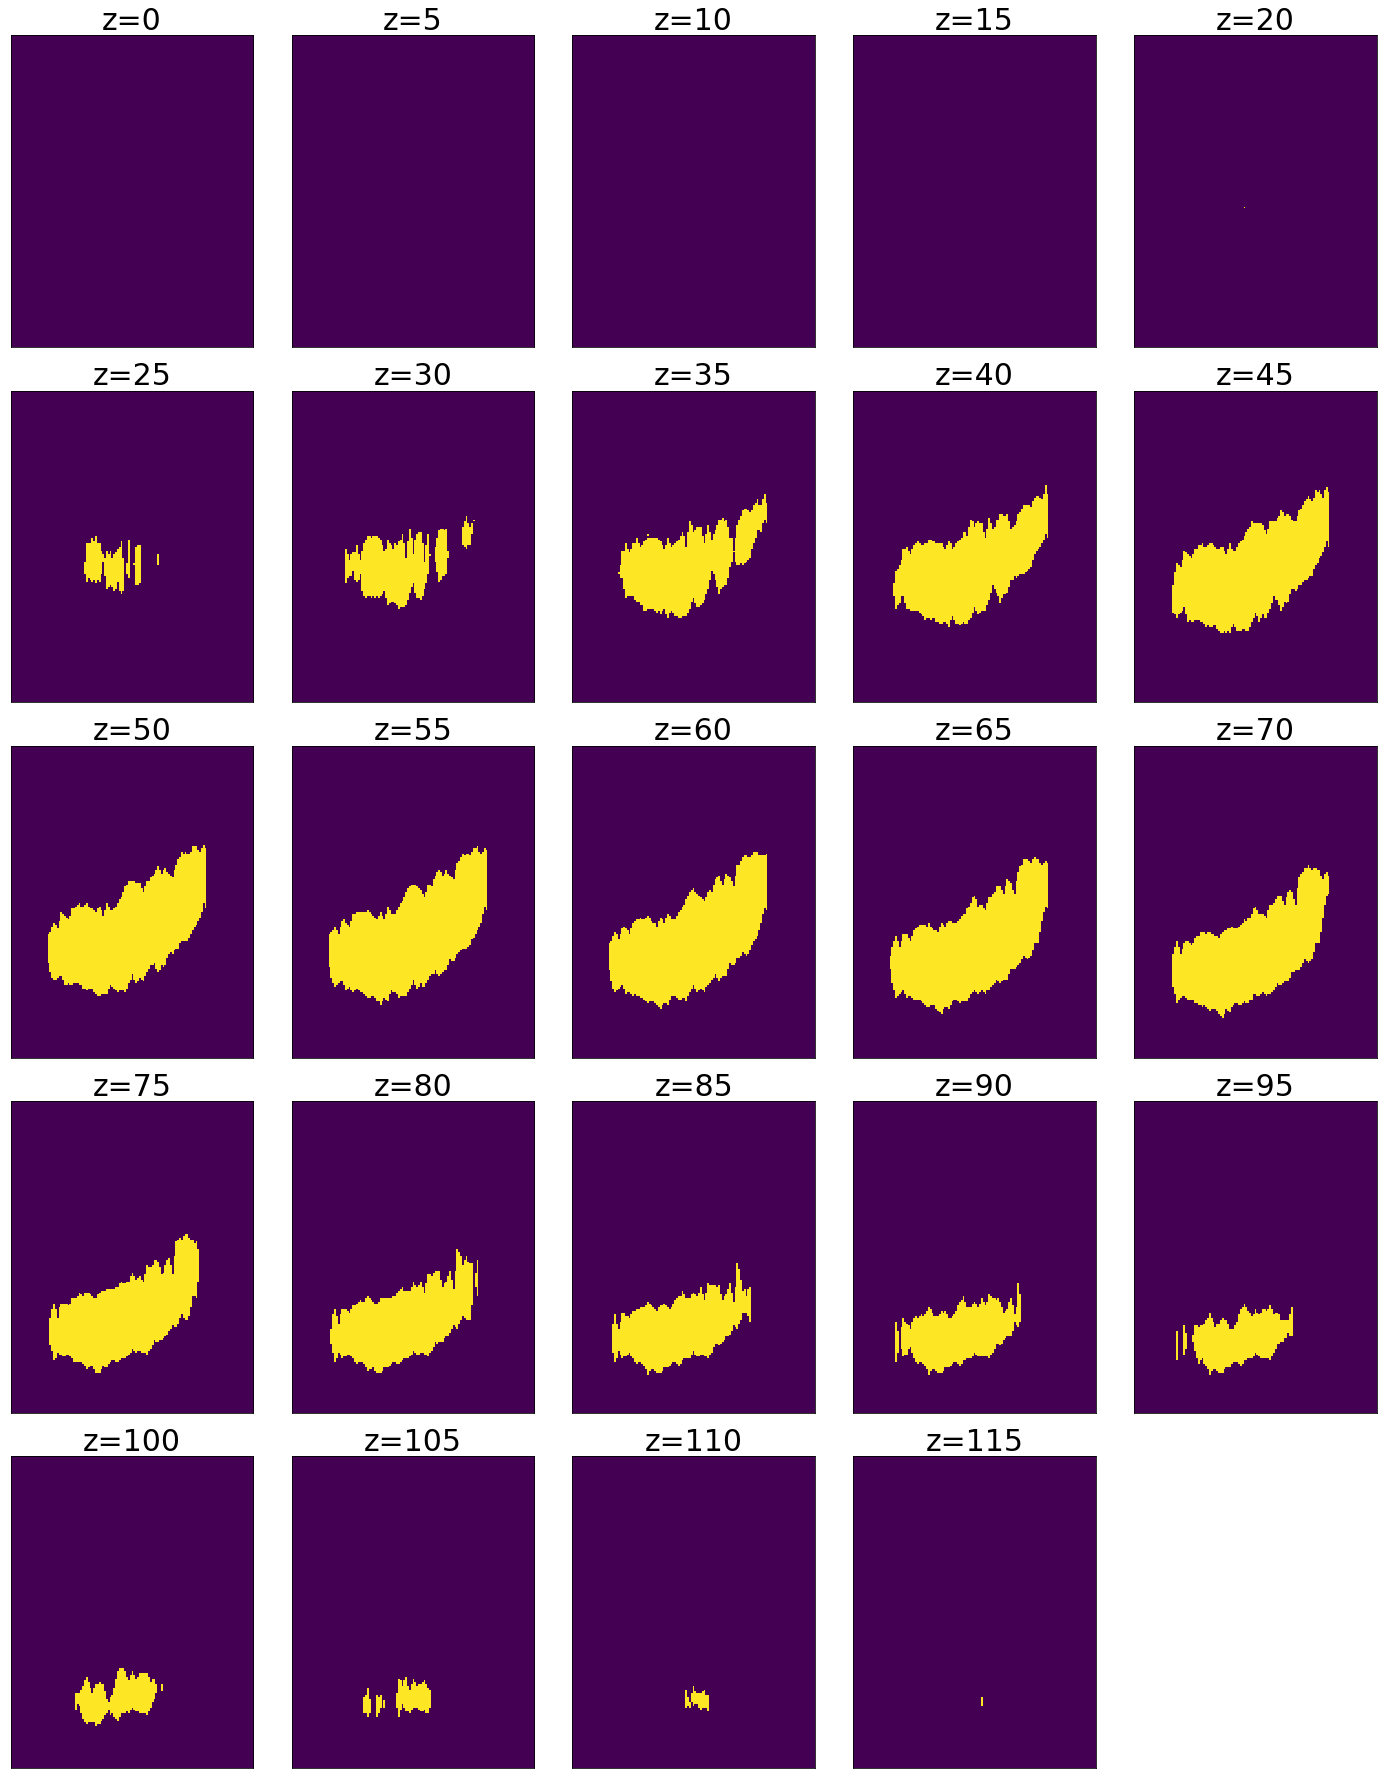

In [109]:
display_volume_sections(volumes['SNR_L'], start_level=0)

In [110]:
for s in volumes.keys():
    vol_fp = DataManager.get_score_volume_filepath(stack=stack, structure=s, downscale=32, volume_type='annotationAsScore')
    create_parent_dir_if_not_exists(vol_fp)
    bp.pack_ndarray_file(volumes[s], vol_fp)
    upload_to_s3(vol_fp)
    
    bbox_fp = DataManager.get_score_volume_bbox_filepath(stack=stack, structure=s, detector_id=None, prep_id=None, downscale=32, volume_type='annotationAsScore')
    create_parent_dir_if_not_exists(bbox_fp)
    np.savetxt(bbox_fp, volume_bbox)
    upload_to_s3(bbox_fp)

aws s3 cp "/shared/CSHL_volumes/LM48/LM48_down32_annotationAsScoreVolume/score_volumes/LM48_down32_annotationAsScoreVolume_3N_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/LM48/LM48_down32_annotationAsScoreVolume/score_volumes/LM48_down32_annotationAsScoreVolume_3N_L.bp"
aws s3 cp "/shared/CSHL_volumes/LM48/LM48_down32_annotationAsScoreVolume/score_volumes/LM48_down32_annotationAsScoreVolume_3N_L_bbox.txt" "s3://mousebrainatlas-data/CSHL_volumes/LM48/LM48_down32_annotationAsScoreVolume/score_volumes/LM48_down32_annotationAsScoreVolume_3N_L_bbox.txt"
aws s3 cp "/shared/CSHL_volumes/LM48/LM48_down32_annotationAsScoreVolume/score_volumes/LM48_down32_annotationAsScoreVolume_SNR_L.bp" "s3://mousebrainatlas-data/CSHL_volumes/LM48/LM48_down32_annotationAsScoreVolume/score_volumes/LM48_down32_annotationAsScoreVolume_SNR_L.bp"
aws s3 cp "/shared/CSHL_volumes/LM48/LM48_down32_annotationAsScoreVolume/score_volumes/LM48_down32_annotationAsScoreVolume_SNR_L_bbox.txt" "s3://mousebrainatlas-data/CSHL

In [111]:
for name, mkrs in markers_atlasResol.iteritems():
    markers_fp = DataManager.get_lauren_markers_filepath(stack=stack, structure=name)
    create_parent_dir_if_not_exists(markers_fp)
    bp.pack_ndarray_file(markers_atlasResol[name], markers_fp)
    upload_to_s3(markers_fp)

aws s3 cp "/shared/lauren_data/markers/LM48/LM48_markers_SNR_L.bp" "s3://mousebrainatlas-data/lauren_data/markers/LM48/LM48_markers_SNR_L.bp"
